# Just a file to check that the ADR was consistent with previous published results. Indeed it was (comparison with Yannick Copin's HDR).
---

In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

import astropy.io.fits as F
import astropy.coordinates as AC
import astropy.time as AT
from astropy import units as u

from pyifu import adr as ADR

In [3]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['image.origin'] = True

### These ain't right, just to see

In [4]:
temperature = 8.5                # outside temp (C) 
pressure = 784                   # outside pressure (mbar)
humidity = 25                    # outside humidity (%)
airmass = 1.114                  # airmass

### Data from Y. Copin HDR

In [5]:
geod_lat_test = AC.Latitude('+19:49:23', unit=u.deg)                         
hour_angle_test = AC.Angle('63.43', unit=u.deg)   
dec_test = AC.Angle('22.01', unit=u.deg)   


zenithdist2, parangle2 = ADR.hadec2zdpar(hour_angle_test.degree, dec_test.degree, geod_lat_test.degree, deg=True)

print('\n Parallactic angle = {x:.4f} degrees -> same as HDR ?'.format(x=parangle2))


 Parallactic angle = 79.4499 degrees -> same as HDR ?


In [7]:
pixsize2 = 0.43            # Size of a pixel in arcsec

x_ref2 =  -5*pixsize2                           # in arcsec
y_ref2 =  1*pixsize2                           # in arcsec
lbdaref2 = 3400                       # in angstrom

lbdas2 = np.linspace(lbdaref2, 5000, 10)

In [8]:
adr2 = ADR.ADR(airmass=1.834, parangle=parangle2, temperature=temperature,
              pressure=pressure, lbdaref=lbdaref2, relathumidity=humidity)

arcsecshift2 = adr2.refract(x_ref2, y_ref2, lbdas2)

In [9]:
xpix_shift2 = (arcsecshift2[0])/pixsize2
ypix_shift2 = (arcsecshift2[1])/pixsize2

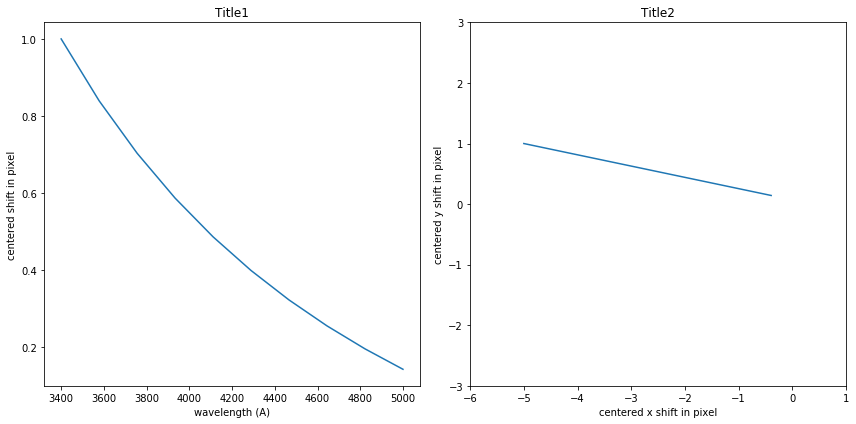

In [10]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

ax1.plot(lbdas2, ypix_shift2)
ax1.set_title('Title1')
ax1.set_xlabel('wavelength (A)')
ax1.set_ylabel('centered shift in pixel')

ax2.plot(xpix_shift2, ypix_shift2)
ax2.set_title('Title2')
ax2.set_xlabel('centered x shift in pixel')
ax2.set_ylabel('centered y shift in pixel')
ax2.set_ylim(-3,3)
ax2.set_xlim(-6,1)

plt.tight_layout()
plt.show()